In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from pathlib import Path

In [2]:
file_path = Path('../Machine Learning/popular_features_no_camps.csv')
fighter_df = pd.read_csv(file_path)
fighter_df.head(10)

,Results,avg_KD,avg_opp_KD,avg_SIG_STR_pct,avg_opp_SIG_STR_pct,avg_TD_pct,avg_opp_TD_pct,avg_SUB_ATT,avg_opp_SUB_ATT,avg_REV,...,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,Stance,Height,Reach,Weight,Age
0,1,7.002250e-01,0.050782,0.537746,0.478625,0.533821,0.250396,0.253488,0.003906,0.250031,...,0,6,10,6,0,1.0,185.42,185.42,155.0,36.0
1,1,2.441410e-04,0.156250,0.218606,0.195974,0.305999,0.002083,0.519641,0.000031,0.517578,...,1,8,1,10,0,2.0,185.42,182.88,170.0,41.0
2,1,4.004499e-01,0.101564,0.585491,0.497250,0.067643,0.500793,0.506975,0.007813,0.500063,...,0,6,9,6,0,1.0,185.42,185.42,155.0,35.0
3,1,4.882810e-04,0.312500,0.187211,0.161948,0.281999,0.004166,1.039281,0.000063,0.035156,...,1,8,1,10,0,2.0,185.42,182.88,170.0,41.0
4,1,8.008998e-01,0.203128,0.480982,0.444499,0.135285,0.001585,0.013950,0.015625,0.000126,...,0,6,9,5,0,1.0,185.42,185.42,155.0,35.0
5,1,3.260000e-08,0.015633,0.430145,0.396977,0.167964,0.574681,0.413200,0.063069,0.000077,...,2,6,3,9,0,2.0,172.72,180.34,155.0,36.0
6,1,9.765630e-04,0.625001,0.374422,0.323895,0.063998,0.008332,0.078563,0.000126,0.070313,...,1,8,1,9,0,2.0,185.42,182.88,170.0,41.0
7,1,2.035992e-01,0.812510,0.533930,0.467997,0.321142,0.006340,0.055802,0.062500,0.000504,...,0,6,8,5,0,1.0,185.42,185.42,155.0,34.0
8,1,1.379585e-02,0.125244,0.501162,0.341597,0.581214,0.257905,0.606232,0.250038,0.017584,...,2,10,5,2,0,1.0,180.34,193.04,185.0,36.0
9,1,1.300000e-07,0.062531,0.530580,0.307907,0.671857,0.298725,0.652800,0.252274,0.000309,...,2,6,3,8,0,2.0,172.72,180.34,155.0,35.0


In [3]:
fighter_df = fighter_df.dropna()
fighter_df.head(10)

,Results,avg_KD,avg_opp_KD,avg_SIG_STR_pct,avg_opp_SIG_STR_pct,avg_TD_pct,avg_opp_TD_pct,avg_SUB_ATT,avg_opp_SUB_ATT,avg_REV,...,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,Stance,Height,Reach,Weight,Age
0,1,7.002250e-01,0.050782,0.537746,0.478625,0.533821,0.250396,0.253488,0.003906,0.250031,...,0,6,10,6,0,1.0,185.42,185.42,155.0,36.0
1,1,2.441410e-04,0.156250,0.218606,0.195974,0.305999,0.002083,0.519641,0.000031,0.517578,...,1,8,1,10,0,2.0,185.42,182.88,170.0,41.0
2,1,4.004499e-01,0.101564,0.585491,0.497250,0.067643,0.500793,0.506975,0.007813,0.500063,...,0,6,9,6,0,1.0,185.42,185.42,155.0,35.0
3,1,4.882810e-04,0.312500,0.187211,0.161948,0.281999,0.004166,1.039281,0.000063,0.035156,...,1,8,1,10,0,2.0,185.42,182.88,170.0,41.0
4,1,8.008998e-01,0.203128,0.480982,0.444499,0.135285,0.001585,0.013950,0.015625,0.000126,...,0,6,9,5,0,1.0,185.42,185.42,155.0,35.0
5,1,3.260000e-08,0.015633,0.430145,0.396977,0.167964,0.574681,0.413200,0.063069,0.000077,...,2,6,3,9,0,2.0,172.72,180.34,155.0,36.0
6,1,9.765630e-04,0.625001,0.374422,0.323895,0.063998,0.008332,0.078563,0.000126,0.070313,...,1,8,1,9,0,2.0,185.42,182.88,170.0,41.0
7,1,2.035992e-01,0.812510,0.533930,0.467997,0.321142,0.006340,0.055802,0.062500,0.000504,...,0,6,8,5,0,1.0,185.42,185.42,155.0,34.0
8,1,1.379585e-02,0.125244,0.501162,0.341597,0.581214,0.257905,0.606232,0.250038,0.017584,...,2,10,5,2,0,1.0,180.34,193.04,185.0,36.0
9,1,1.300000e-07,0.062531,0.530580,0.307907,0.671857,0.298725,0.652800,0.252274,0.000309,...,2,6,3,8,0,2.0,172.72,180.34,155.0,35.0


In [4]:
y = fighter_df["Results"]
X = fighter_df.drop(columns="Results")

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y,  random_state=1, stratify=y)
X_train.shape

(6918, 68)

In [6]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=68, activation="relu", input_dim=68))

In [9]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [10]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                4692      
                                                                 
 dense_1 (Dense)             (None, 1)                 69        
                                                                 
Total params: 4,761
Trainable params: 4,761
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=1000)

Epoch 1/1000
217/217 [==============================] - 1s 1ms/step - loss: 0.7096 - accuracy: 0.5322
Epoch 2/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5572
Epoch 3/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.5731
Epoch 4/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.5824
Epoch 5/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.5932
Epoch 6/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.5947
Epoch 7/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.6016
Epoch 8/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.6104
Epoch 9/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.6523 - accuracy: 0.6148
Epoch 10/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.648

217/217 [==============================] - 0s 1ms/step - loss: 0.4840 - accuracy: 0.7709
Epoch 81/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.7692
Epoch 82/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7728
Epoch 83/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7744
Epoch 84/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7735
Epoch 85/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7754
Epoch 86/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7778
Epoch 87/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.7722
Epoch 88/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.7758
Epoch 89/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.4675 - a

217/217 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8339
Epoch 160/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8377
Epoch 161/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8371
Epoch 162/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8343
Epoch 163/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8332
Epoch 164/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.8348
Epoch 165/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8297
Epoch 166/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8332
Epoch 167/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8390
Epoch 168/1000
217/217 [==============================] - 0s 1ms/step - loss: 0

217/217 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8659
Epoch 238/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3225 - accuracy: 0.8607
Epoch 239/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3096 - accuracy: 0.8725
Epoch 240/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3125 - accuracy: 0.8683
Epoch 241/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.8643
Epoch 242/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3113 - accuracy: 0.8679
Epoch 243/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3146 - accuracy: 0.8654
Epoch 244/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3029 - accuracy: 0.8757
Epoch 245/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.3089 - accuracy: 0.8685
Epoch 246/1000
217/217 [==============================] - 0s 1ms/step - loss: 0

217/217 [==============================] - 0s 1ms/step - loss: 0.2634 - accuracy: 0.8955
Epoch 316/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2697 - accuracy: 0.8906
Epoch 317/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2679 - accuracy: 0.8938
Epoch 318/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2659 - accuracy: 0.8961
Epoch 319/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2589 - accuracy: 0.8951
Epoch 320/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2658 - accuracy: 0.8909
Epoch 321/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2588 - accuracy: 0.8972
Epoch 322/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.8965
Epoch 323/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2610 - accuracy: 0.8968
Epoch 324/1000
217/217 [==============================] - 0s 1ms/step - loss: 0

217/217 [==============================] - 0s 1ms/step - loss: 0.2349 - accuracy: 0.9060
Epoch 394/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2302 - accuracy: 0.9111
Epoch 395/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2278 - accuracy: 0.9092
Epoch 396/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2297 - accuracy: 0.9107
Epoch 397/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2314 - accuracy: 0.9101
Epoch 398/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2337 - accuracy: 0.9060
Epoch 399/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2276 - accuracy: 0.9111
Epoch 400/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2311 - accuracy: 0.9063
Epoch 401/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2312 - accuracy: 0.9095
Epoch 402/1000
217/217 [==============================] - 0s 1ms/step - loss: 0

217/217 [==============================] - 0s 1ms/step - loss: 0.2025 - accuracy: 0.9230
Epoch 472/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2008 - accuracy: 0.9224
Epoch 473/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2043 - accuracy: 0.9222
Epoch 474/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2019 - accuracy: 0.9228
Epoch 475/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2008 - accuracy: 0.9234
Epoch 476/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2029 - accuracy: 0.9214
Epoch 477/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9237
Epoch 478/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2160 - accuracy: 0.9151
Epoch 479/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 0.9204
Epoch 480/1000
217/217 [==============================] - 0s 1ms/step - loss: 0

217/217 [==============================] - 0s 1ms/step - loss: 0.1848 - accuracy: 0.9287
Epoch 550/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1759 - accuracy: 0.9368
Epoch 551/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1810 - accuracy: 0.9338
Epoch 552/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1885 - accuracy: 0.9245
Epoch 553/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1722 - accuracy: 0.9376
Epoch 554/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1813 - accuracy: 0.9297
Epoch 555/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.9321
Epoch 556/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1784 - accuracy: 0.9329
Epoch 557/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1823 - accuracy: 0.9341
Epoch 558/1000
217/217 [==============================] - 0s 1ms/step - loss: 0

217/217 [==============================] - 0s 1ms/step - loss: 0.1612 - accuracy: 0.9404
Epoch 628/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1600 - accuracy: 0.9423
Epoch 629/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1632 - accuracy: 0.9387
Epoch 630/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1587 - accuracy: 0.9441
Epoch 631/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1550 - accuracy: 0.9451
Epoch 632/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1778 - accuracy: 0.9337
Epoch 633/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9417
Epoch 634/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1647 - accuracy: 0.9397
Epoch 635/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1534 - accuracy: 0.9419
Epoch 636/1000
217/217 [==============================] - 0s 1ms/step - loss: 0

217/217 [==============================] - 0s 1ms/step - loss: 0.1375 - accuracy: 0.9516
Epoch 706/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1452 - accuracy: 0.9490
Epoch 707/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1431 - accuracy: 0.9524
Epoch 708/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1466 - accuracy: 0.9493
Epoch 709/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.9481
Epoch 710/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1375 - accuracy: 0.9543
Epoch 711/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1364 - accuracy: 0.9536
Epoch 712/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1452 - accuracy: 0.9481
Epoch 713/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1499 - accuracy: 0.9461
Epoch 714/1000
217/217 [==============================] - 0s 1ms/step - loss: 0

217/217 [==============================] - 0s 1ms/step - loss: 0.1253 - accuracy: 0.9574
Epoch 784/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1196 - accuracy: 0.9623
Epoch 785/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.9588
Epoch 786/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9582
Epoch 787/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 0.9591
Epoch 788/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1186 - accuracy: 0.9615
Epoch 789/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1279 - accuracy: 0.9584
Epoch 790/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.9610
Epoch 791/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.9601
Epoch 792/1000
217/217 [==============================] - 0s 1ms/step - loss: 0

217/217 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.9639
Epoch 862/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1137 - accuracy: 0.9639
Epoch 863/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1217 - accuracy: 0.9550
Epoch 864/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1063 - accuracy: 0.9663
Epoch 865/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1105 - accuracy: 0.9636
Epoch 866/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.9669
Epoch 867/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.9610
Epoch 868/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1137 - accuracy: 0.9605
Epoch 869/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1064 - accuracy: 0.9669
Epoch 870/1000
217/217 [==============================] - 0s 1ms/step - loss: 0

217/217 [==============================] - 0s 1ms/step - loss: 0.1007 - accuracy: 0.9682
Epoch 940/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.0914 - accuracy: 0.9748
Epoch 941/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.9673
Epoch 942/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9688
Epoch 943/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.9659
Epoch 944/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9689
Epoch 945/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.9663
Epoch 946/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9725
Epoch 947/1000
217/217 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.9731
Epoch 948/1000
217/217 [==============================] - 0s 1ms/step - loss: 0

<AxesSubplot:>

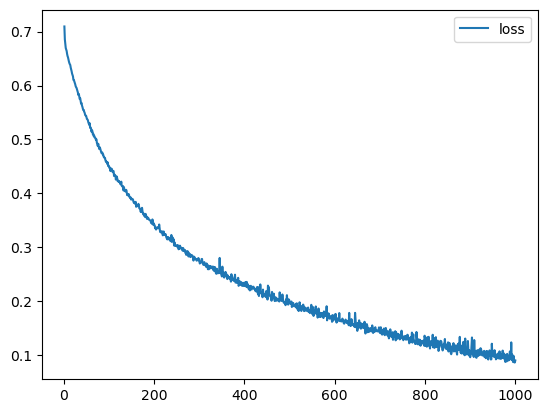

In [13]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

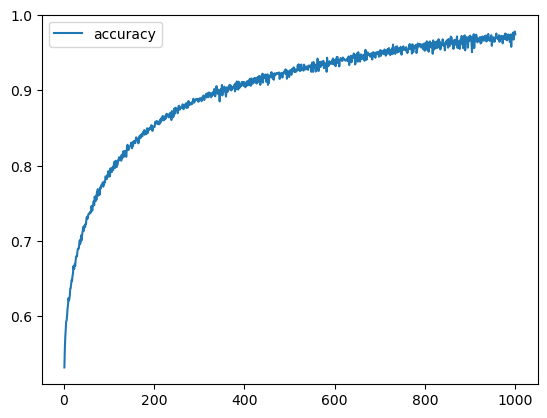

In [14]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

73/73 - 0s - loss: 3.6989 - accuracy: 0.5336 - 210ms/epoch - 3ms/step
Loss: 3.698917865753174, Accuracy: 0.5335934162139893


In [16]:
nn_model.predict(X_test)

73/73 [==============================] - 0s 1ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)